In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [10]:
# Load the Customers and Transactions data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Check for missing data and clean if needed
customers.isnull().sum(), transactions.isnull().sum()

(CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
 TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price              0
 dtype: int64)

In [11]:
# Merge the customers and transactions data on CustomerID
merged_data = pd.merge(transactions, customers, on='CustomerID')

# Feature Engineering: Calculate total spend, frequency of purchases, and other relevant features
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',          # Total spend
    'TransactionID': 'count',     # Number of transactions (frequency)
    'Quantity': 'sum',            # Total quantity bought
}).reset_index()

# Normalize the features (StandardScaler)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalValue', 'TransactionID', 'Quantity']])

# Check the transformed features
scaled_features[:5]


array([[-0.06170143, -0.01145819, -0.12203296],
       [-0.87774353, -0.46749414, -0.44800021],
       [-0.40585722, -0.46749414,  0.20393428],
       [ 1.03254704,  1.35664965,  1.67078689],
       [-0.78392861, -0.92353008, -0.93695108]])

C:\Users\DELL\anaconda3.x\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3.x\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3.x\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3.x\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

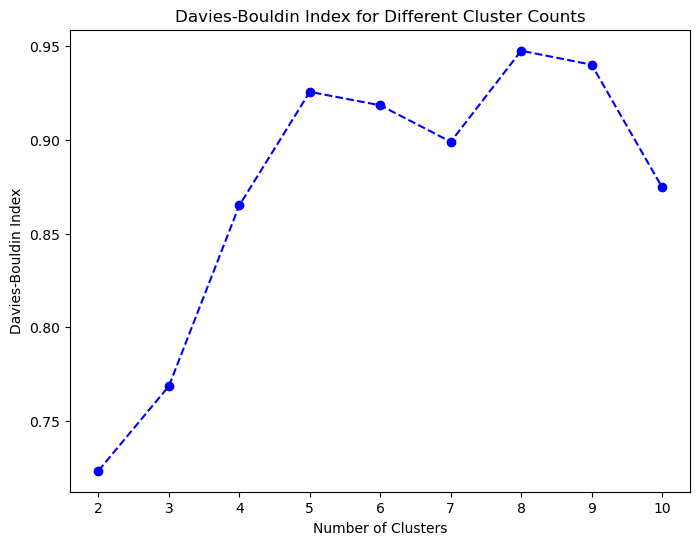

Optimal number of clusters: 2


In [12]:
# Set up the number of clusters to test and calculate the Davies-Bouldin Index for each
db_index_values = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    
    # Calculate Davies-Bouldin index for the current number of clusters
    db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
    db_index_values.append(db_index)

# Plot the Davies-Bouldin index for different cluster sizes
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), db_index_values, marker='o', linestyle='--', color='b')
plt.title('Davies-Bouldin Index for Different Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

# Select the optimal number of clusters based on the DB index (lowest value)
optimal_clusters = np.argmin(db_index_values) + 2
print(f"Optimal number of clusters: {optimal_clusters}")

In [13]:
# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Assign the cluster labels to the customer data
customer_features['Cluster'] = customer_features['Cluster'].astype(str)

# Show the first few rows of the clustered data
customer_features.head()

C:\Users\DELL\anaconda3.x\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3.x\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,TotalValue,TransactionID,Quantity,Cluster
0,C0001,3354.52,5,12,0
1,C0002,1862.74,4,10,0
2,C0003,2725.38,4,14,0
3,C0004,5354.88,8,23,1
4,C0005,2034.24,3,7,0


In [14]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the optimal number of clusters
sil_score = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.49487297008885417


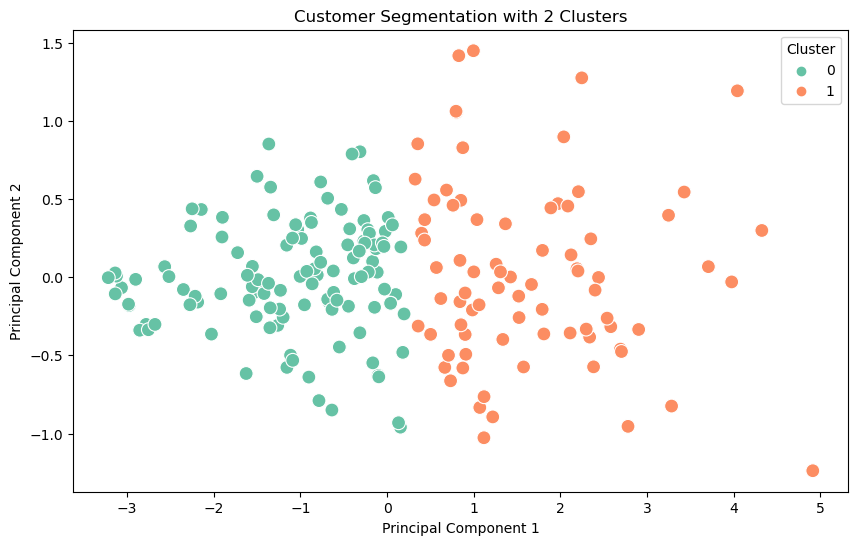

In [15]:
from sklearn.decomposition import PCA

# Apply PCA to reduce features to 2D for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot the clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=customer_features['Cluster'], palette='Set2', s=100)
plt.title(f'Customer Segmentation with {optimal_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [8]:
# Combine numerical and additional categorical features
final_features = pd.concat([pd.DataFrame(numerical_features_scaled), customer_features[['Region', 'CustomerAge']]], axis=1)


In [16]:
# Convert column names to strings
final_features.columns = final_features.columns.astype(str)

# 
TypeError: KMeans.fit() missing 1 required positional argument: 'X'
Now fit the KMeans model
KMeans.fit(final_features)


TypeError: KMeans.fit() missing 1 required positional argument: 'X'

In [ ]:
# Find the optimal number of clusters using Davies-Bouldin Index
db_index_values = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(final_features)
    db_index = davies_bouldin_score(final_features, kmeans.labels_)
    db_index_values.append(db_index)


In [ ]:
# Plot DB Index for different numbers of clusters
plt.plot(range(2, 11), db_index_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('DB Index for Different Cluster Counts')
plt.show()


In [ ]:
# Based on DB Index plot, select the optimal number of clusters
optimal_clusters = 3  # This can be adjusted based on the plot


In [ ]:
# Fit KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(final_features)


In [ ]:
# Add the cluster centers for visualization
centers = scaler.inverse_transform(kmeans.cluster_centers_)


In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_features['TotalValue'], y=customer_features['TransactionID'], hue=customer_features['Cluster'], palette='Set2', s=100)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', color='black', s=200, label='Cluster Centers')
plt.title(f'Customer Segmentation with {optimal_clusters} Clusters')
plt.xlabel('Total Spend')
plt.ylabel('Transaction Frequency')
plt.legend()
plt.show()


In [ ]:
# Save the results to a CSV file
customer_features.to_csv('Customer_Segmentation.csv', index=False)


In [ ]:
# Output the DB Index value
print(f'Davies-Bouldin Index for {optimal_clusters} clusters: {db_index_values[optimal_clusters - 2]}')
